In [3]:
import arcpy 
import os

workspace = r"C:\Users\Asiha\Downloads\Ex7"
rasters = []

Walk = arcpy.da.Walk(workspace, topdown=True, datatype="RasterDataset")
for dirpath, dirnames, filenames in Walk:
    for file in filenames:
        print(os.path.join(dirpath, file))
        


C:\Users\Asiha\Downloads\Ex7\elevation
C:\Users\Asiha\Downloads\Ex7\elev_clip
C:\Users\Asiha\Downloads\Ex7\landcover.tif
C:\Users\Asiha\Downloads\Ex7\slope
C:\Users\Asiha\Downloads\Ex7\tm.img


In [4]:
import arcpy 
from arcpy.sa import *
arcpy.env.workspace = r"C:\Users\Asiha\Downloads\Ex7"
ras = Raster("elevation")

print(ras.compressionType)
print(ras.format)
print(ras.meanCellWidth)
print(ras.meanCellHeight)
print(ras.pixelType)
print(ras.spatialReference.name)
print(ras.bandCount)

None
GRID
30.0
30.0
F32
NAD_1983_UTM_Zone_13N
1


In [5]:
import arcpy 
from arcpy.sa import *
arcpy.env.workspace = r"C:\Users\Asiha\Downloads\Ex7"
ras = Raster("landcover.tif")

print(ras.compressionType)
print(ras.format)
print(ras.meanCellWidth)
print(ras.meanCellHeight)
print(ras.pixelType)
print(ras.spatialReference.name)
print(ras.bandCount)

LZW
TIFF
30.0
30.0
S8
NAD_1983_UTM_Zone_13N
1


In [6]:
import arcpy 
from arcpy.sa import *
arcpy.env.workspace = r"C:\Users\Asiha\Downloads\Ex7"
ras = Raster("tm.img")

print(ras.compressionType)
print(ras.format)
print(ras.meanCellWidth)
print(ras.meanCellHeight)
print(ras.pixelType)
print(ras.spatialReference.name)
print(ras.bandCount)

RLE
IMAGINE Image
0.00027777799999999665
0.0002777779999999973
U8
GCS_North_American_1983
3


In [7]:
import arcpy
from arcpy.sa import *
elev = arcpy.Raster(r"C:\Users\Asiha\Downloads\Ex7\elevation")
outraster = Slope(elev)

outraster.save("slope")


RuntimeError: ERROR 000872: Output Raster: Dataset C:\Users\Asiha\Downloads\Ex7\slope already exists and cannot be overwritten since the Overwrite existing datasets option is disabled.

In [8]:
import arcpy 
from arcpy.sa import *
arcpy.env.workspace = r"C:\Users\Asiha\Downloads\Ex7"
ras = Raster("slope")

print(ras.compressionType)
print(ras.format)
print(ras.meanCellWidth)
print(ras.meanCellHeight)
print(ras.pixelType)
print(ras.spatialReference.name)
print(ras.bandCount)

None
GRID
30.0
30.0
F32
NAD_1983_UTM_Zone_13N
1


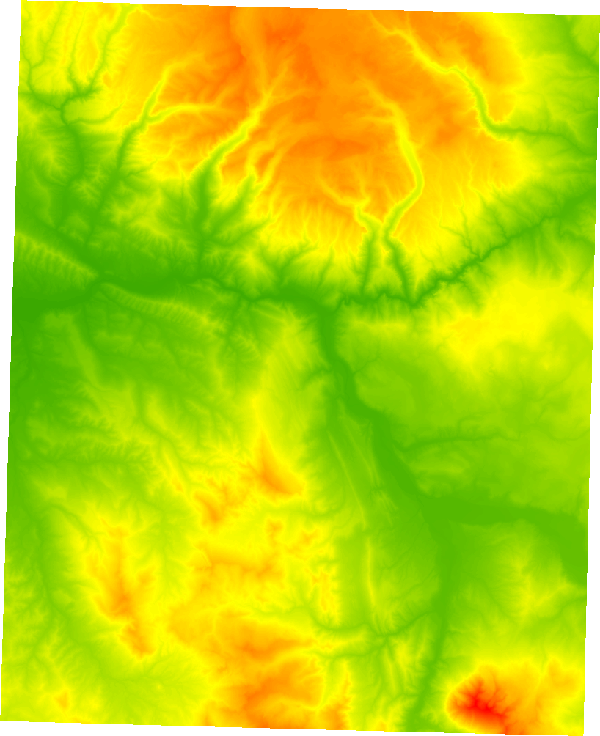

In [ ]:
import arcpy
Render("elevation", colormap="Slope")


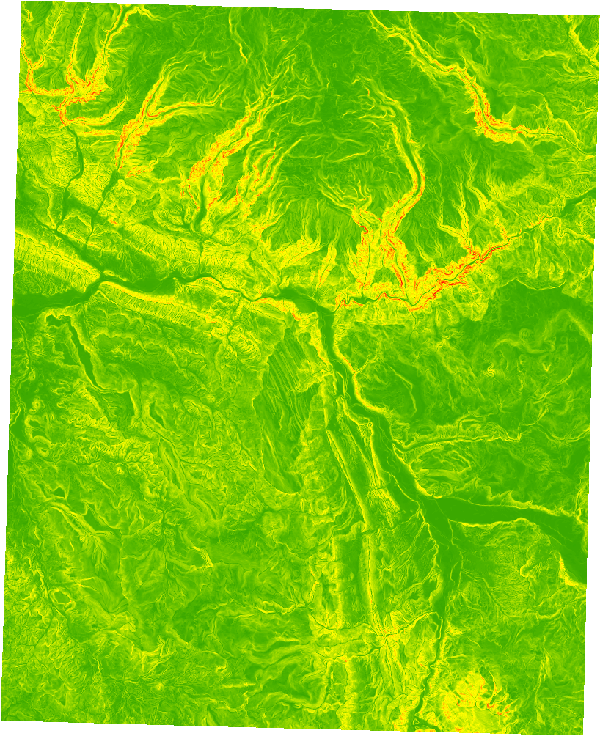

In [ ]:
import arcpy
Render("Slope", colormap="Slope")
# The slope analysis allows the data to focus more on the topographic features of the the contours of the area where water moved into the rivers and watershed. 
# It allows for one to see the sources of water and the directional movement it flows.

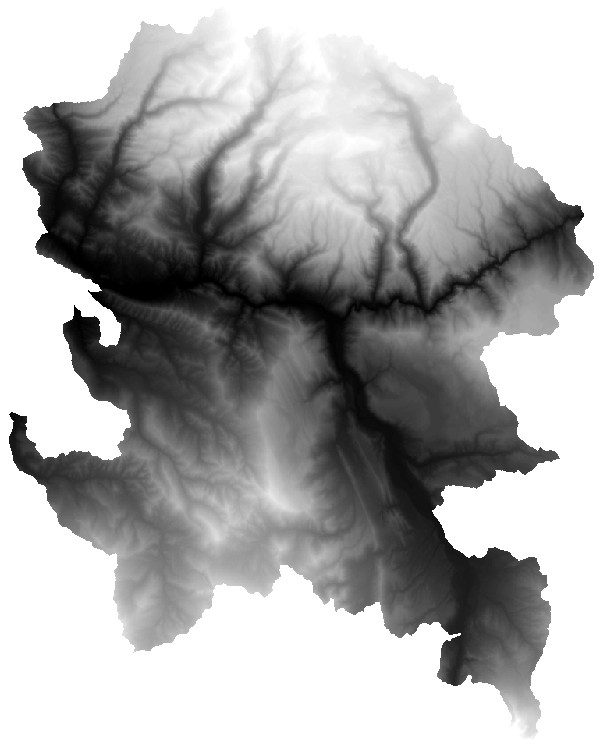

In [11]:
from arcpy.sa import *
from arcpy.ia import *
elev_clip = Clip("elevation", r"C:\Users\Asiha\Downloads\Ex7\watershed_HUC12.shp")
elev_clip



In [ ]:
outraster.save("elev_clip")

import arcpy 
from arcpy.sa import *
arcpy.env.workspace = r"C:\Users\Asiha\Downloads\Ex7"
ras = Raster("elev_clip")

print(ras.compressionType)
print(ras.format)
print(ras.meanCellWidth)
print(ras.meanCellHeight)
print(ras.pixelType)
print(ras.spatialReference.name)
print(ras.bandCount)

#The clipped raster's boundaries are limited to the one's in the Wastershed data, so the output raster only shows the elevation within the area of the watershed. This is useful because you can clearly see the sources of water for the watershed and where it flows.


RuntimeError: ERROR 000872: Output Raster: Dataset C:\Users\Asiha\Downloads\Ex7\elev_clip already exists and cannot be overwritten since the Overwrite existing datasets option is disabled.

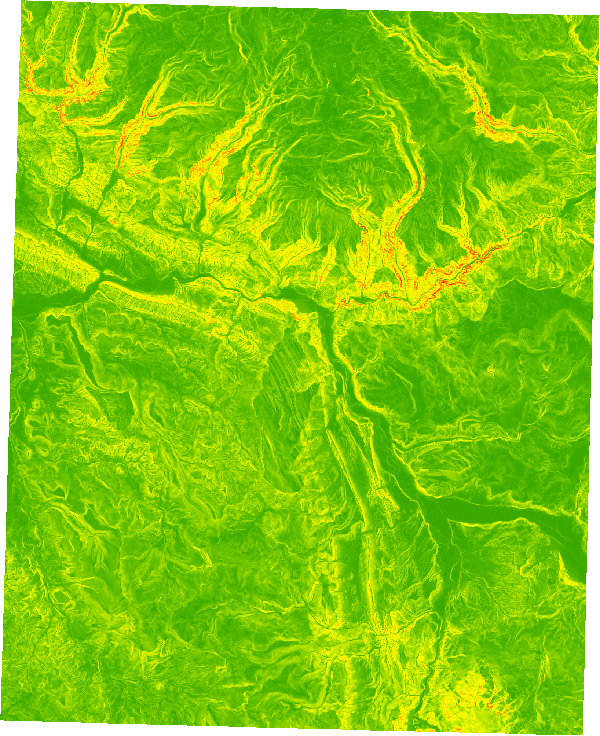

In [29]:
import arcpy
Render("raster_calc1", colormap="slope")


In [ ]:
#The subtraction of the bands shows the differences in the values between  bands 1 and 3 and focuses on the areas that do not overlap. While the addition shows the overlaps and will saturate these areas where bands 1 and 3 overlap more than where they do not.


'\nThe subtraction of the bands shows the differences in the values between \nbands 1 and 3 and focuses on the areas that do not overlap. While the addition \nshows the overlaps and will saturate these areas where bands 1 and 3 overlap more \nthan where they do not.\n'

In [ ]:
outraster.save("raster_calc1")


In [5]:
import numpy as np
import arcpy
from arcpy.sa import Raster, RasterCellIterator
arcpy.env.workspace = r"C:\Users\Asiha\Downloads\Ex7"
# read the elevation model

dem = Raster("elevation")
arcpy.env.overwriteOutput = True

#get knowledge about the input raster
raster_info = dem.getRasterInfo()
cell_x = dem.meanCellWidth
cell_y = dem.meanCellHeight

# change the raster info so the output type is 32bit unsigned integer
raster_info.setPixelType("U32")
#create a new raster based on the raster info
elev_reclass = Raster(raster_info)
#update the raster using cell iterator
with RasterCellIterator({'rasters':[dem,elev_reclass]}) as rci:
    for r, c in rci:
        if cell_y >= 2000:
            "elevation"[r,c] = 1
        else:
            "elevation"[r,c] = 0
            
        # modify this block here to do the classification of elevation to 1 or 0

elev_reclass.save('elev_relcass')

TypeError: 'str' object does not support item assignment

In [ ]:
import arcpy
import numpy
raster = r"C:\Users\Asiha\Downloads\Ex7\elevation"
array = arcpy.RasterToNumPyArray(raster)
print(array.min())
print(array.max())
print(array.mean())
print(array.std())

#NumPy is a popular open-source python library for performing numerical and mathematical operations. NumPy arrays are useful because they are more compact, easier to store, and quicker calling data. Numpt arrays are an array of uniform values which makes this possible.


-3.4028235e+38
3942.4353
-inf
inf


c:\Users\Asiha\.conda\envs\arcpy_clone\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Asiha\.conda\envs\arcpy_clone\Lib\site-packages\numpy\core\_methods.py:215: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
